In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import torch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
oppScrData = pd.read_excel ('/Users/sanyamkakkar/Desktop/Spring/Ml760/CS760-Project/OppScrData.xlsx')

In [3]:
def normalize_ss(data):
  return StandardScaler().fit_transform(data)

def normalize_min_max(data):
    n = data.shape[1]    
    for i in range(n-1):
      data[:,i] = (data[:,i] - np.min(data[:,i]))/(np.max(data[:,i])- np.min(data[:,i]))
    return data

def plot(y_pred, y_test):
  plt.figure()
  x = [i+1 for i in range(len(y_test))]
  plt.plot((x,x),([i for i in y_pred], [j for j in y_test]),c='green')
  plt.scatter(x, y_pred, label="predicted_y")
  plt.scatter(x, y_test, label="actual_y")
  plt.legend()
  plt.show()

def mean_absolute_error(actual, predictions):
  n = len(actual)
  return sum(abs(actual - predictions))/n

In [4]:
def get_dead_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', 'DEATH [d from CT]','Sex', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    dead_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if (not ignore) and (not pd.isna(row['DEATH [d from CT]'])):
          row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )
          dead_people_ct_data.append(row)

    dead_people_ct_data = np.array(dead_people_ct_data)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    return np.array(dead_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> number of days lost
# dead_people_ct_data[1:] -> ct_data



In [5]:
dead_people_ct_data = get_dead_people_ct_data(oppScrData)

<ipython-input-4-12190a7316c1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )


In [6]:
y = dead_people_ct_data[:,0]
# X = normalize_ss(dead_people_ct_data[:,1:])
# X = normalize_min_max(dead_people_ct_data[:,1:])
X = dead_people_ct_data[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

0.081233395863205


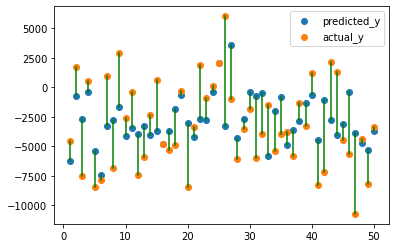

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

3697.9448046875


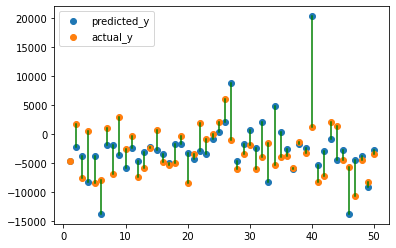

In [8]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(mean_absolute_error(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

In [9]:
def get_all_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    all_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if not ignore:
          all_people_ct_data.append(row)

    return np.array(all_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> biological age
# dead_people_ct_data[1:] -> ct_data

In [10]:
a = get_all_people_ct_data(oppScrData)

In [11]:
days_lost = -lr.predict(poly.fit_transform(a[:,1:]))

In [12]:
a[:,0] = a[:,0]*365 + days_lost

In [13]:
X = a[:, 1:]
X2=a[:, 1:]
y = a[:,0]
y2=a[:,0]/365

In [14]:


from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler()

X_norm=normalize_ss(X)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=2)




X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(X_norm, y2, test_size=0.1, random_state=2)

#With Days

In [17]:
RFmod2 = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF2 = RandomizedSearchCV(RFmod2,param_grid2,#model and parameters
                             #number of cross validation folds
                             )


clfRF2.fit(X_train,Y_train)
params3=clfRF2.best_params_
params3




{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 6,
 'max_depth': 20,
 'bootstrap': True}

In [18]:
RFparams2={'n_estimators':[300],
          'min_samples_split':[12],
          'min_samples_leaf': [6],
           'max_features': [6],
           'max_depth': [20],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams2,refit=True)
clf.fit(X_train,Y_train)
        
clf.best_estimator_.score(X_test, Y_test)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.3040382838448551

In [19]:
y_pred=clf.predict(X_test)

In [20]:
Mse = mean_squared_error(Y_test,y_pred
                         )
error=mean_absolute_error(Y_test,y_pred)
mape=mean_absolute_percentage_error(Y_test,y_pred)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 2728.57
MApe: 0.08
error 1894.9378876579947


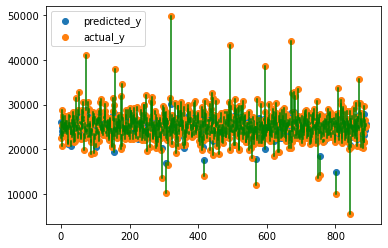

In [21]:
plot(y_test=Y_test, y_pred=y_pred)

In [22]:
#Years

In [23]:
RFmod = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF = RandomizedSearchCV(RFmod,param_grid,#model and parameters
                             #number of cross validation folds
                             )


clfRF.fit(X_train2,Y_train2)
params=clfRF.best_params_
params



{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 4,
 'max_depth': 20,
 'bootstrap': True}

In [24]:
RFparams4={'n_estimators':[300],
          'min_samples_split':[10],
          'min_samples_leaf': [5],
           'max_features': [4],
           'max_depth': [20],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams4,refit=True)
clf.fit(X_train2,Y_train2)
        
clf.best_estimator_.score(X_test2, Y_test2)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.2962274800988466

In [25]:
y_pred2=clf.predict(X_test2)


In [26]:
Mse = mean_squared_error(Y_test2,y_pred2
                         )
error=mean_absolute_error(Y_test2,y_pred2)
mape=mean_absolute_percentage_error(Y_test2,y_pred2)
print("RMSE: %.2f" % (Mse**(1/2.0)))
print("MApe: %.2f" %(mape))
print("error",np.mean(error))

RMSE: 7.52
MApe: 0.08
error 5.208459546158014


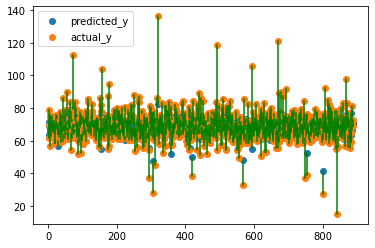

In [27]:
plot(y_test=Y_test2, y_pred=y_pred2)